In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile

%matplotlib inline

In [2]:
df = pd.DataFrame()
for folder in glob.glob('*_input_*/'):
    sc_file = folder + "score.sc"
    if os.path.exists(sc_file):
        dsc = pd.read_csv(sc_file, sep='\s+', header=1)
        df = pd.concat([df,dsc])
df = df.reset_index()
print(df)

      index  SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0         0  SCORE:     -373.562        0.0 -642.951  139.321 -348.250   
1         1  SCORE:     -373.708        0.0 -656.787  144.441 -328.591   
2         2  SCORE:     -370.784        0.0 -624.883  134.742 -336.134   
3         3  SCORE:     -369.259        0.0 -604.216  134.309 -327.086   
4         4  SCORE:     -378.807        0.0 -653.712  138.716 -333.696   
5         0  SCORE:     -380.219        0.0 -645.775  130.901 -332.910   
6         1  SCORE:     -379.554        0.0 -621.435  134.814 -346.019   
7         2  SCORE:     -386.928        0.0 -661.034  131.067 -328.203   
8         3  SCORE:     -358.790        0.0 -616.348  130.575 -367.661   
9         4  SCORE:     -386.955        0.0 -640.918  130.298 -333.773   
10        0  SCORE:     -380.826        0.0 -625.857  134.414 -348.987   
11        1  SCORE:     -379.451        0.0 -612.893  123.323 -339.168   
12        2  SCORE:     -376.980      

19.3093238095


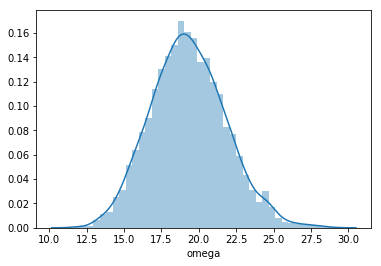

In [3]:
sns.distplot(df["omega"], bins=40)
print(df['omega'].mean())

4.63674134199


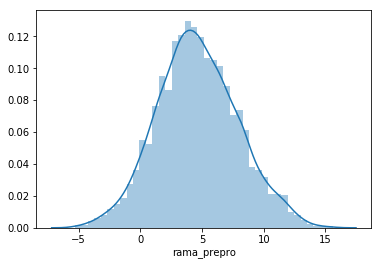

In [4]:
sns.distplot(df["rama_prepro"], bins=40)
print(df['rama_prepro'].mean())

-84.4881564935


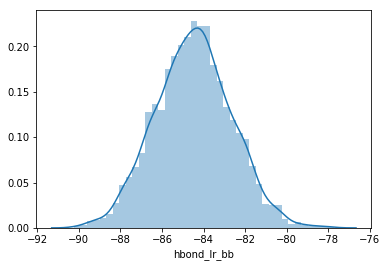

In [5]:
sns.distplot(df["hbond_lr_bb"], bins=40)
print(df['hbond_lr_bb'].mean())

-372.803120563


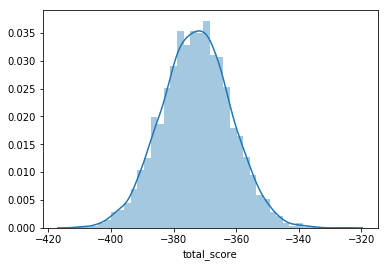

In [6]:
sns.distplot(df["total_score"], bins=40)
print(df['total_score'].mean())

-50.4730926407


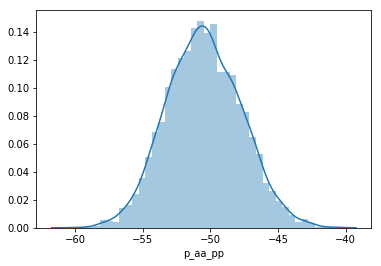

In [7]:
sns.distplot(df["p_aa_pp"], bins=40)
print(df['p_aa_pp'].mean())

In [9]:
worst_torsions = df.loc[(df['omega'] > 20.0) & (df['hbond_lr_bb'] > -83)]
for model in worst_torsions.description:
    folder_id = "_".join(model.split("_")[0:6])
    source = folder_id + "/" + model + ".pdb"
    target = "worst/" + model + ".pdb"
    copyfile(source, target)

In [10]:
sns.distplot(best_torsions["hbond_sc"], bins=40)
print(best_torsions['hbond_sc'].mean())

NameError: name 'best_torsions' is not defined

In [3]:
for index, row in df.iterrows():
#for model in df.description:
    model = row["description"]
    HBNet = []
    energy_table = []
    labels = []
    tot_energy = 0
    mean_energy = 0
    tot_hbond = 0
    mean_hbond = 0
    folder_id = "_".join(model.split("_")[0:6])
    pdb_file = folder_id + "/" + model + ".pdb"
    with open(pdb_file, 'r') as pdb_f:
        for line in pdb_f:
            if "HBNet" in line:
                HBNet.append(int(line.split()[2]))
            elif line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
                labels = pdb_f.readline().strip().split(' ')
                next(pdb_f)
                next(pdb_f)
                for line in pdb_f:
                    if line.startswith("#END_POSE_ENERGIES_TABLE"):
                        break
                    energy_table.append(line.strip().split(' '))
    de = pd.DataFrame(energy_table, columns=labels)
    de['label'] = de['label'].str.replace('HIS_D', 'HIS')
    new_c = de['label'].str.split('_', expand=True)
    de['resn'] = new_c[1].astype(int)
    HBNet_DE = []
    for item in HBNet:
        if item != 68 and item != 10:
            HBNet_DE.append(item)
    tot_energy = de['total'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_energy = tot_energy/len(HBNet)
    tot_hbond = de['hbond_sc'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_hbond = tot_hbond/len(HBNet)
    tot_energy_DE = de['total'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_energy_DE = tot_energy/len(HBNet_DE)
    tot_hbond_DE = de['hbond_sc'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_hbond_DE = tot_hbond/len(HBNet_DE)
    df.at[index,'tot_energy'] = tot_energy
    df.at[index,'mean_energy'] = mean_energy
    df.at[index,'tot_hbond'] = tot_hbond
    df.at[index,'mean_hbond'] = mean_hbond
    df.at[index,'nHBNet'] = len(HBNet)
    df.at[index,'tot_energy_DE'] = tot_energy_DE
    df.at[index,'mean_energy_DE'] = mean_energy_DE
    df.at[index,'tot_hbond_DE'] = tot_hbond_DE
    df.at[index,'mean_hbond_DE'] = mean_hbond_DE
print(df)
                

      index  SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0         0  SCORE:     -373.562        0.0 -642.951  139.321 -348.250   
1         1  SCORE:     -373.708        0.0 -656.787  144.441 -328.591   
2         2  SCORE:     -370.784        0.0 -624.883  134.742 -336.134   
3         3  SCORE:     -369.259        0.0 -604.216  134.309 -327.086   
4         4  SCORE:     -378.807        0.0 -653.712  138.716 -333.696   
5         0  SCORE:     -380.219        0.0 -645.775  130.901 -332.910   
6         1  SCORE:     -379.554        0.0 -621.435  134.814 -346.019   
7         2  SCORE:     -386.928        0.0 -661.034  131.067 -328.203   
8         3  SCORE:     -358.790        0.0 -616.348  130.575 -367.661   
9         4  SCORE:     -386.955        0.0 -640.918  130.298 -333.773   
10        0  SCORE:     -380.826        0.0 -625.857  134.414 -348.987   
11        1  SCORE:     -379.451        0.0 -612.893  123.323 -339.168   
12        2  SCORE:     -376.980      

-11.2266209957


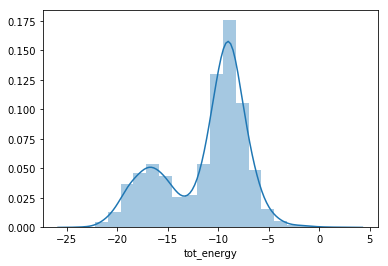

In [88]:
sns.distplot(df["tot_energy"], bins=20)
print(df['tot_energy'].mean())

-4.29897011003


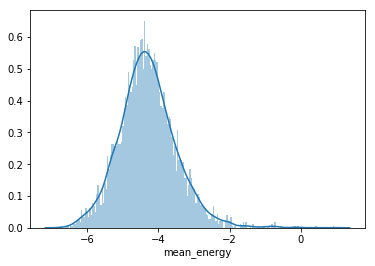

In [81]:
sns.distplot(df["mean_energy"], bins=200)
print(df['mean_energy'].mean())

-2.40555613853


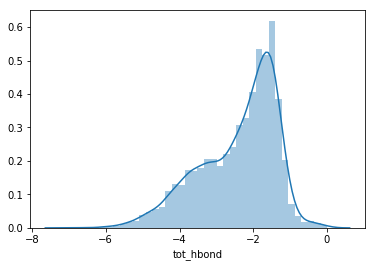

In [82]:
sns.distplot(df["tot_hbond"], bins=40)
print(df['tot_hbond'].mean())

-0.914223649892


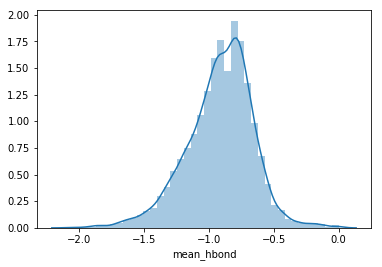

In [83]:
sns.distplot(df["mean_hbond"], bins=40)
print(df['mean_hbond'].mean())

2.64177489177


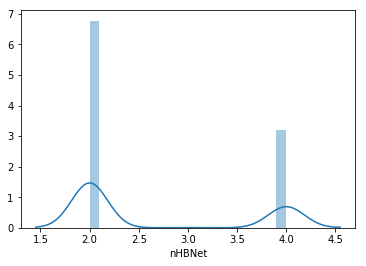

-5.46421340043


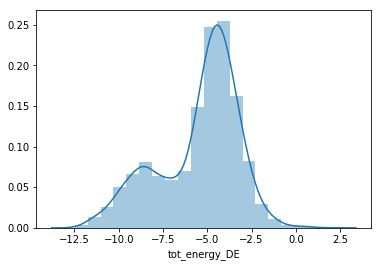

In [89]:
sns.distplot(df["tot_energy_DE"], bins=20)
print(df['tot_energy_DE'].mean())

-8.61253945022


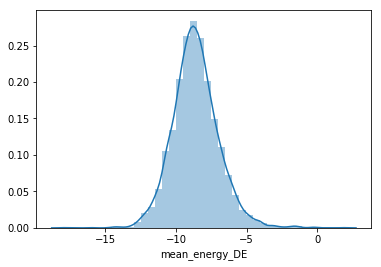

In [91]:
sns.distplot(df["mean_energy_DE"], bins=40)
print(df['mean_energy_DE'].mean())

-1.41858644156


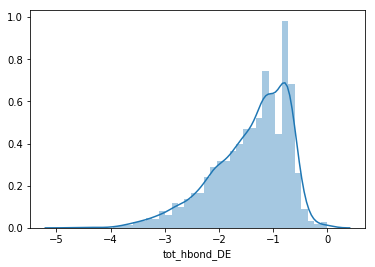

In [92]:
sns.distplot(df["tot_hbond_DE"], bins=40)
print(df['tot_hbond_DE'].mean())

-1.83151779978


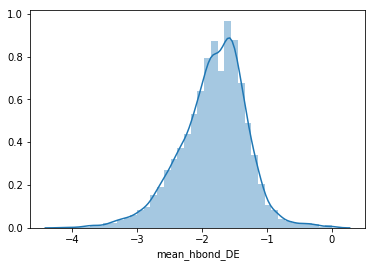

In [93]:
sns.distplot(df["mean_hbond_DE"], bins=40)
print(df['mean_hbond_DE'].mean())

# In terms of mean_energy, it does not really matter if we consider the full motif or the DE only. mean_energy_DE would only allow keeping a few of exta points along the secondary correlation line. It does not correlate with omega, rama_prepro or hbond_lr_bb.

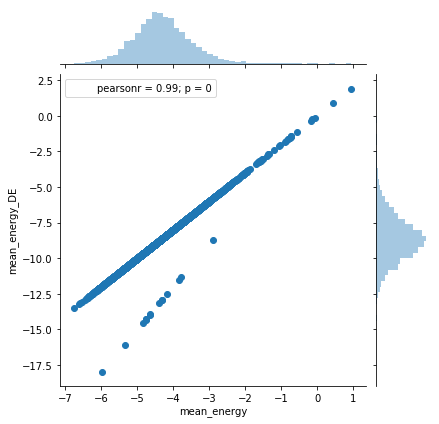

In [94]:
sns.jointplot("mean_energy", "mean_energy_DE", df);

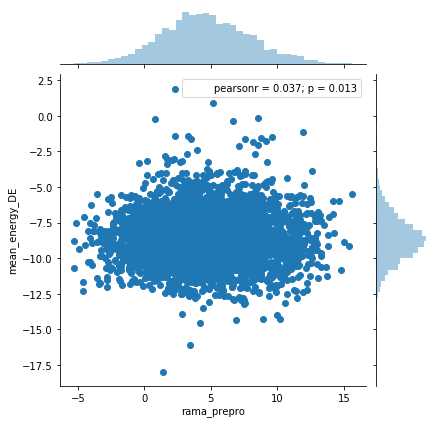

In [106]:
sns.jointplot("rama_prepro", "mean_energy_DE", df);

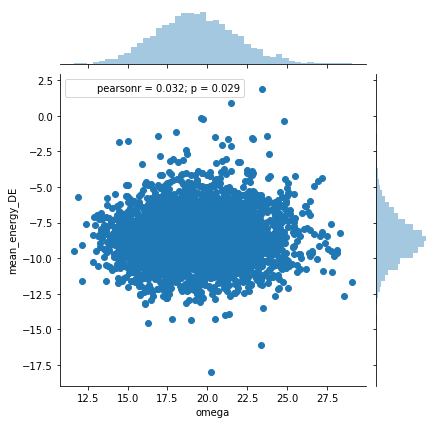

In [107]:
sns.jointplot("omega", "mean_energy_DE", df);

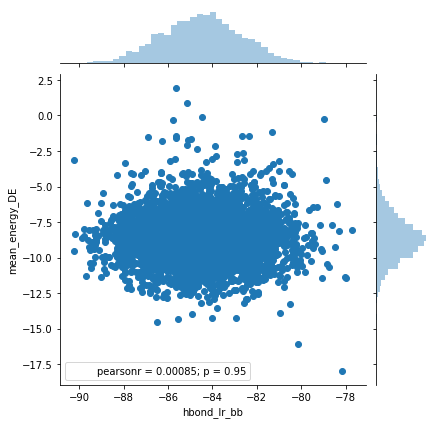

In [108]:
sns.jointplot("hbond_lr_bb", "mean_energy_DE", df);

# The cutoff of -1.8 mean_hbond_DE is more intuitive and will help keeping the variants along the secondary correlation axis. It does not correlate with omega, rama_prepro of hbond_lr_bb

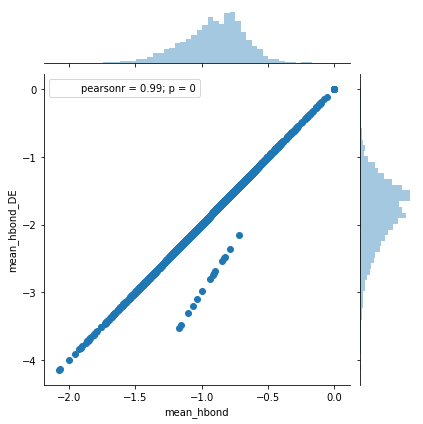

In [97]:
sns.jointplot("mean_hbond", "mean_hbond_DE", df);

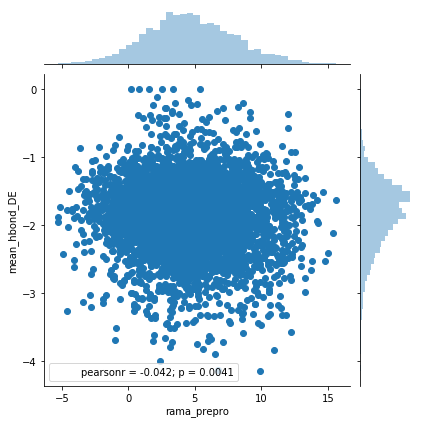

In [100]:
sns.jointplot("rama_prepro", "mean_hbond_DE", df);

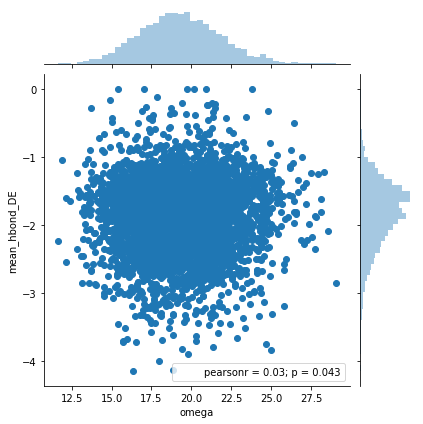

In [101]:
sns.jointplot("omega", "mean_hbond_DE", df);

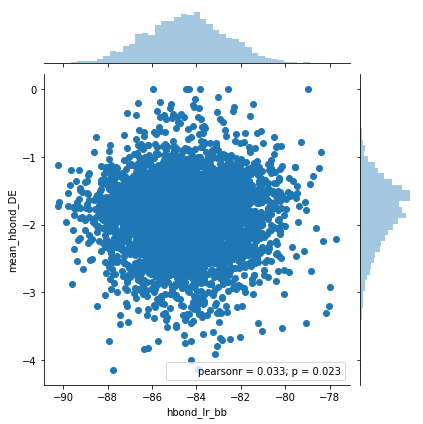

In [102]:
sns.jointplot("hbond_lr_bb", "mean_hbond_DE", df);

In [111]:
df.loc[df['mean_energy_DE']<-8.6].shape

(2421, 32)

In [112]:
df.loc[df['mean_hbond_DE']<-1.8].shape

(2240, 32)

In [113]:
df.loc[(df['mean_hbond_DE']<-1.8) & (df['mean_energy_DE']<-8.6)].shape

(1446, 32)

In [114]:
best_motif = df.loc[(df['mean_hbond_DE']<-1.8) & (df['mean_energy_DE']<-8.6)]
for model in best_motif.description:
    folder_id = "_".join(model.split("_")[0:6])
    source = folder_id + "/" + model + ".pdb"
    target = "best_motif/" + model + ".pdb"
    copyfile(source, target)

19.2993886584


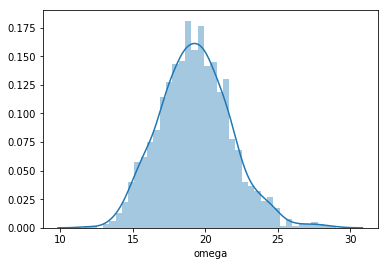

In [115]:
sns.distplot(best_motif["omega"], bins=40)
print(best_motif['omega'].mean())

4.54700691563


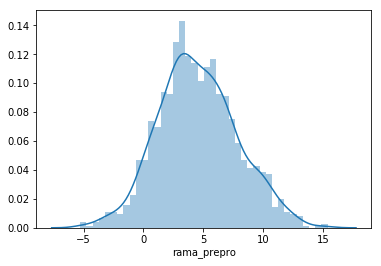

In [116]:
sns.distplot(best_motif["rama_prepro"], bins=40)
print(best_motif['rama_prepro'].mean())

-84.4815477178


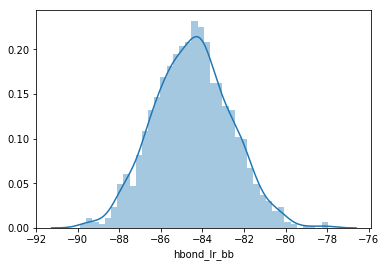

In [117]:
sns.distplot(best_motif["hbond_lr_bb"], bins=40)
print(best_motif['hbond_lr_bb'].mean())

In [118]:
df.loc[(df['mean_hbond_DE']>-1.8) & (df['mean_energy_DE']>-8.6)].shape

(1405, 32)

In [119]:
worst_motif = df.loc[(df['mean_hbond_DE']>-1.8) & (df['mean_energy_DE']>-8.6)]
for model in worst_motif.description:
    folder_id = "_".join(model.split("_")[0:6])
    source = folder_id + "/" + model + ".pdb"
    target = "worst_motif/" + model + ".pdb"
    copyfile(source, target)